# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: come to the practical sessions or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *MLPPlot.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import MLPClassifier
from Toolbox.MLPPlot import MLPPlot

def plot_confusion_matrix(cm,y):
    "Plots confusion matrix cm using label vector y" 
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

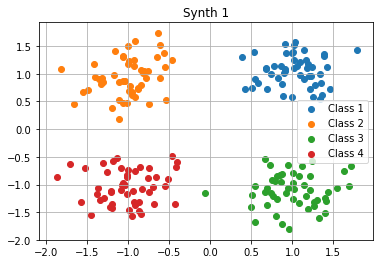

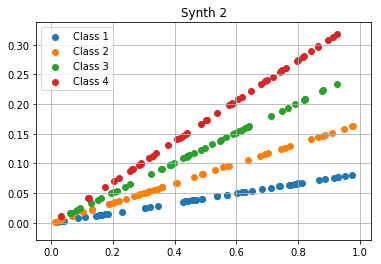

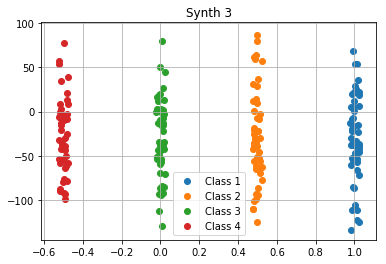

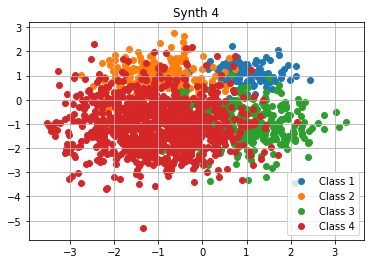

In [2]:
# Import the data

synth1 = loadmat('Data/synth1.mat')
synth2 = loadmat('Data/synth2.mat')
synth3 = loadmat('Data/synth3.mat')
synth4 = loadmat('Data/synth4.mat')

# Seperate data into features and labels
X1 = synth1['X']
y1 = synth1['y']
X2 = synth2['X']
y2 = synth2['y']
X3 = synth3['X']
y3 = synth3['y']
X4 = synth4['X']
y4 = synth4['y']

# Plot data
def koolPlot (X,y,title):
    plt.scatter(X[y.T[0] == 0][:,0], X[y.T[0] == 0][:,1], label = 'Class 1')
    plt.scatter(X[y.T[0] == 1][:,0], X[y.T[0] == 1][:,1], label = 'Class 2')
    plt.scatter(X[y.T[0] == 2][:,0], X[y.T[0] == 2][:,1], label = 'Class 3')
    plt.scatter(X[y.T[0] == 3][:,0], X[y.T[0] == 3][:,1], label = 'Class 4')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

koolPlot(X1,y1,'Synth 1')
koolPlot(X2,y2,'Synth 2')
koolPlot(X3,y3,'Synth 3')
koolPlot(X4,y4,'Synth 4')

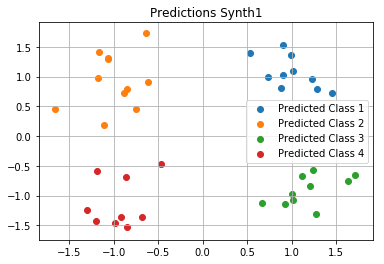

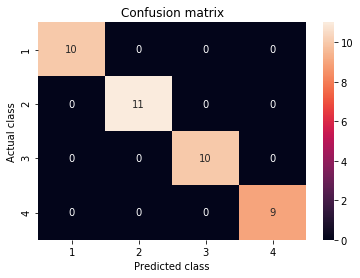

Accurary: 1.0
Error Rate / Misclassification Rate: 0.0


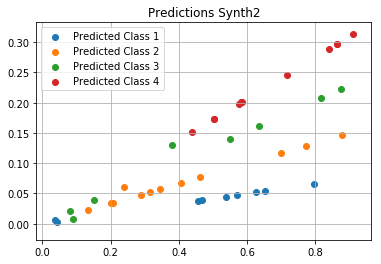

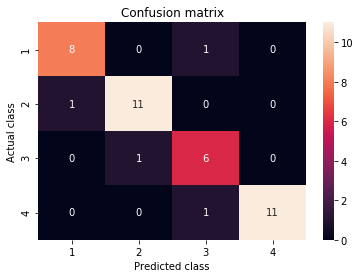

Accurary: 0.9
Error Rate / Misclassification Rate: 0.1


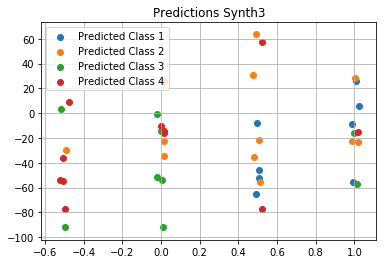

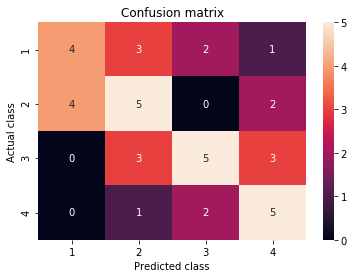

Accurary: 0.48
Error Rate / Misclassification Rate: 0.52


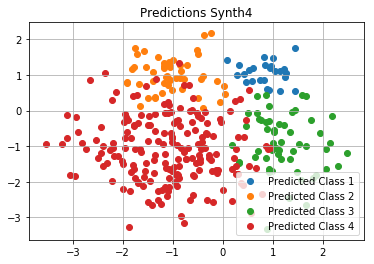

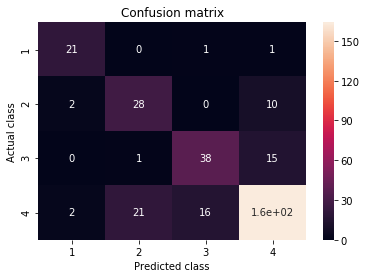

Accurary: 0.78
Error Rate / Misclassification Rate: 0.22


In [3]:
def classifiedPlot (X,y,neighbors,Metric,l):
    
    # seperate data into train and test set
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X , y , test_size = 0.2)
    
    # fit the model
    knbs = KNeighborsClassifier(n_neighbors=neighbors, metric = Metric)
    knbs.fit(X_train,y_train.ravel())

    #plot data
    plt.scatter(X_test[knbs.predict(X_test) == 0][:,0], X_test[knbs.predict(X_test) == 0][:,1], label = 'Predicted Class 1')
    plt.scatter(X_test[knbs.predict(X_test) == 1][:,0], X_test[knbs.predict(X_test) == 1][:,1], label = 'Predicted Class 2')
    plt.scatter(X_test[knbs.predict(X_test) == 2][:,0], X_test[knbs.predict(X_test) == 2][:,1], label = 'Predicted Class 3')
    plt.scatter(X_test[knbs.predict(X_test) == 3][:,0], X_test[knbs.predict(X_test) == 3][:,1], label = 'Predicted Class 4')
    plt.grid()
    plt.title('Predictions Synth' + l)
    plt.legend()
    plt.show()
    
    #generate confusion matrix
    cm = confusion_matrix(y_test.ravel(), knbs.predict(X_test))
    plot_confusion_matrix(cm,y.ravel())
    
    #calculate accuracy & error
    accuracy = round((cm[0,0] + cm[1,1] + cm[2,2] + cm[3,3]) / len(X_test), 2)
    print('Accurary: ' + str(accuracy))
    error = round(1-accuracy,2)
    print('Error Rate / Misclassification Rate: ' + str(error))
    
classifiedPlot(X1,y1,3,'euclidean','1')
classifiedPlot(X2,y2,2,'euclidean','2')
classifiedPlot(X3,y3,1,'cityblock','3')
classifiedPlot(X4,y4,5,'euclidean','4')

*Double click to type your answer for 6.1.1 here:*

The euclidean distance works better for classes that are spread around the whole euclidean space, such as Synth 1, 2 and 4 (data varies in both axis-directions). This is due to the euclidean distance measure computing distance using a straight line in the euclidean space. For classes that only vary in one direction, such as Synth3, the cityblock is better suited, since it does not go by straight lines throughout the data, but only horizontal or vertical lines. If the data is only varying in one of these directions, the cityblock distance is smaller and hence better suited for nearest-neighbors classification.
The amount of neighbors should be chosen by examining the variance in the data. The more classes overlap and are close to each other, the more neighbors can help. Hence, Synth1 only needed 3 neighbors whears Synth4 needed 5. Synth2 needed 2 neighbors, given that the classes only overlap at the origin and then seperate. Synth3 has no overlap, so a single neighbor achieves the best result.

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

   Sepal Length  Sepal Width  Petal Length  Petal Width         Type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


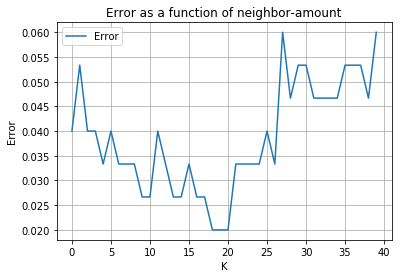

In [4]:
# data preparation
iris = pd.read_excel('Data/iris.xls')
print(iris.head())
X = iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y = iris['Type']

# Leave One Out Crossvalidation
loo = model_selection.LeaveOneOut()
ks = []
for k in range(1,41):
    scores = []
    for train_index, test_index in loo.split(X):
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn.fit(X.iloc[train_index,:], y[train_index])
        y_pred = knn.predict(X.iloc[test_index,:])
        scores.append(metrics.accuracy_score(y[test_index], y_pred))
    ks.append(np.mean(scores))  
    
#plot    
accuracy = np.array(ks)
error = 1 - accuracy
plt.plot(error, label = 'Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Error as a function of neighbor-amount')
plt.legend()
plt.grid(True)
plt.show()    

*Double click to type your answer for 6.1.2 here:*

It seems that up to 20 neighbors are useful (error is decreasing), after which the algorithm starts to overfit the data (error increasing again). The optimal number is thus 20 neighbors.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

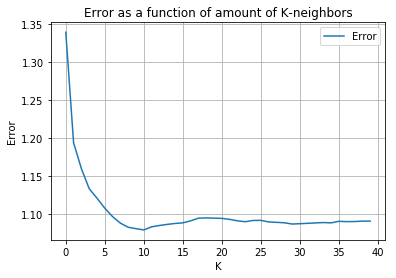

In [5]:
wine = loadmat('Data/wine.mat')['X']
alcohol = wine[:,10]
X = wine[:,0:10]

nn = NearestNeighbors(n_neighbors=41,metric='euclidean')
nn.fit(X)

indices = nn.kneighbors(X, n_neighbors=41, return_distance=False)
indices = indices[:,1:41]

k_scores = []
for k in range(1,41):
    prediction = np.mean(alcohol[indices[:,0:k]], axis=1)
    k_scores.append(metrics.mean_squared_error(alcohol,prediction))
    
plt.plot(k_scores, label = 'Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Error as a function of amount of K-neighbors')
plt.grid(True)
plt.legend()
plt.show()

*Double click to type your answer for 6.1.3 here:*

10 neighbors seem to be optimal, after which the model starts to overfit and increase its error.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class `sklearn.neural_network.MLPClassifier` can be used to create a Multilayer Perceptron that can minimizes the Cross-Entropy loss function for any dataset X with corresponding labels y. See https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the documentation for `MLPClassifier` and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is a non-linear function. Why does it not make sense for a MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The MLPClassifier has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `hidden_layer_sizes`:

> `max_iter`:

> `learning_rate`:

> `learning_rate_init`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1])`
     


A linear activation function results in single layer perceptron-like behavior, whereas a non-linear function is needed to model multiple levels. Moreover, the weights can be more precise this way.

nhidden: The amount of nodes in the hidden layer. Increasing this makes the network more precise (but maybe more susceptible to overfitting).

nepochs: This determines the amount of learning steps, i.e. how often the network forwards and backpropagates. Too low and the network does not learn much.

eta: The learning rate, which determines how significant new input datapoints are vs how significant past learned experience (weights) matter. Too high, and the network is only good for what it has seen recently. Too low and the network needs too many examples of a new class to make reliable predictions.     

Create a MLPClassifier with 1 hidden layer using the `lbfgs`solver and fit the data. You can leave the other parameters unchanged. Use the score method to compute the mean accuracy. How well does the MLP perform on this problem? Use the function `MLPPlot.plot_boundaries` function to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

#### NB: the weights are initialised randomly, so you should run the code a few times untill you get a decent result.


Mean Accuracy: 1.0


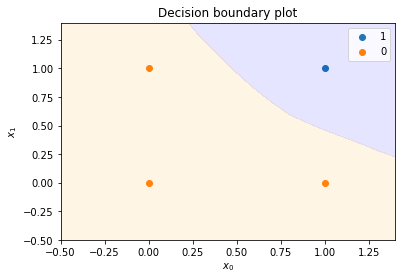

In [6]:
Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])
ytest = np.array([0,0,0,1])

clf = MLPClassifier(solver='lbfgs')
clf.fit(Xtest,ytest)
print('Mean Accuracy: ' + str(clf.score(Xtest,ytest)))
MLPPlot(Xtest,ytest,clf).plot_boundaries()

*Double click to type your answer for 6.2.1 here:*

It works pretty well, since the hidden layer has 100 units, this is more than enough to correctly classify all the data. More hidden units would only increase the necessary computation time, without yieldiny any improvement. This problem is linearly separable, thus even a simple perceptron without hidden layers would suffice.

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make `y` a 1d vector. Make a scatter plot of the two attributes in `X`, coloring the points according to the class labels `y`. How are `X` and `y` related?

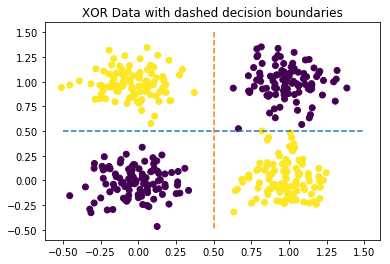

In [7]:
data = loadmat('Data/xor.mat')
X = data['X']
y = data['y'].ravel()


plt.scatter(X[:,0],X[:,1], c=y)
plt.plot([-0.5,1.5], [0.5,0.5], ls="--")
plt.plot([0.5,0.5], [1.5,-0.5], ls="--")
plt.title('XOR Data with dashed decision boundaries')
plt.show()

*Double click to type your answer for 6.2.2 here:*

If both coordinates of a datapoint are above 0.5 or both are below 0.5, they get one class (c=0), whereas if they differ (meaning one above 0.5 and the other below 0.5) then they get the other class (c=1)

#### 6.2.3 (2 points)
Create a MLPClassifier with 1 hidden unit. Fit X and y. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. In each fold, run the learning process 5 times and take the best classification error.  

Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

The average training error is: 0.4280555555555557
The average testing error is: 1.0


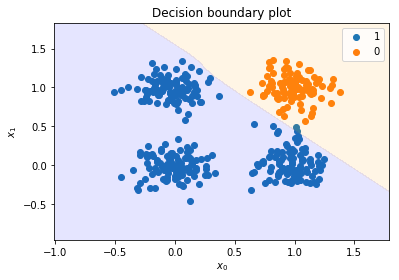

In [8]:
def network (hidden_units):
    kf = model_selection.KFold(n_splits=10)

    best_train_errors = []
    best_test_errors = []

    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        train_errors = []
        test_errors = []
        for i in range(5):
            clf = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (hidden_units))
            clf.fit(X_train,y_train)
            train_errors.append(1-clf.score(X_train,y_train))
            test_errors.append(1-clf.score(X_test,y_test))
        best_train_errors.append(max(train_errors))    
        best_test_errors.append(max(test_errors))

    final_train_error = sum(best_train_errors) / len(best_train_errors)    
    final_test_error = sum(best_test_errors) / len(best_test_errors)

    print('The average training error is: ' + str(final_train_error))
    print('The average testing error is: ' + str(final_test_error))
        

    # network trained on entire dataset
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (hidden_units))
    clf.fit(X,y)
    MLPPlot(X,y,clf).plot_boundaries()
    
network(1)

*Double click to type your answer for 6.2.3 here:*

A singe hidden unit resembles at most a single line to seperate the data. However, this is not enough, as our data needs at least 2 lineas to seperate the data completely. Hence, the training error is very large (usually above 0.4 across multiple runs) and the testing error never gets lower than 0.9.

#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

The average training error is: 0.3369444444444444
The average testing error is: 0.9525


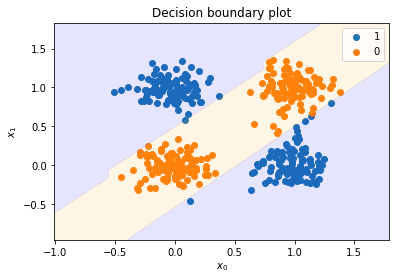

In [12]:
network(2)

*Double click to type your answer for 6.2.4 here:*

Two hidden units successfully model 2 decision boundaries. However, given how the network is randomly initialized, these lines can be anywhere. In this example, the data is separated successfully, but the decision boundaries are nothing like the true ones (refer to exercie 6.2.2 to see the true boundaries). Hence, it is no surprise to see an already improved error rate compared to only a single hidden unit. Nevertheless, the training error is still at 0.3 and the testing error does not get lower than 0.8. This model is clearly not sufficient yet.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

The average training error is: 0.05777777777777778
The average testing error is: 0.017500000000000016


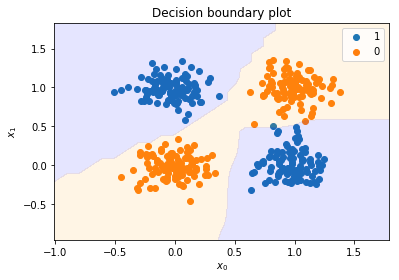

In [10]:
network(10)

*Double click to type your answer for 6.2.5 here:*

If you look at the decision boundaries for 10 hidden units, you can see how the boundaries start to approximate the true boundaries. The training error is very low, below 3% usually, wheras the testing error is around 10% across multiple runs. The benefits of many hidden units are that all sorts of decision boundaries, no matter how complex, can be approximated pretty well. However, too many units can lead to boundaries that are 'too perfect' and thus to overfitting.